In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import evalml
import warnings
warnings.simplefilter('ignore')

In [3]:
df=pd.read_csv(r'D:\PDPU Assignments\Data Mining\DM Assignment 6\diabetes.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [6]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
#data normalization
x=(x-x.mean())/x.std()

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y)

In [9]:
xtrain.shape

(576, 8)

Creating a model without using automl

In [10]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(xtrain,ytrain)
pred=clf.predict(xtest)

In [11]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(ytest,pred)

0.7864583333333334

## AUTOML

In [12]:
from evalml.preprocessing import split_data
xtrain,xtest,ytrain,ytest=split_data(x,y,problem_type='binary')

In [13]:
xtrain.shape

(614, 8)

In [14]:
xtrain

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
22,0.936304,2.349056,1.079497,-1.287373,-0.692439,0.990267,-0.063008,0.659776
497,-0.547562,-1.247772,0.149543,-0.347065,-0.032969,-0.240048,0.226735,-0.700742
395,-0.547562,0.190959,-0.573754,0.217120,1.693802,-0.544456,3.404849,-0.700742
381,-1.141108,-0.497129,-0.057113,0.091745,-0.692439,-1.521098,-0.711910,-0.955839
258,-0.844335,2.255226,-0.987066,-0.284378,2.561526,-0.772762,0.552695,-0.785774
...,...,...,...,...,...,...,...,...
456,-0.844335,0.441173,-0.780410,-1.287373,-0.692439,-0.671293,0.649276,2.445455
435,-1.141108,0.628834,-3.570271,-1.287373,-0.692439,1.320042,-0.805473,-0.360612
398,-0.250789,-1.216495,0.046215,-1.287373,-0.692439,-1.381577,-0.250133,-0.700742
48,0.936304,-0.559683,-0.160441,0.718617,-0.692439,0.901481,-0.385950,-0.190548


In [16]:
from evalml.automl import AutoMLSearch
auto=AutoMLSearch(xtrain,ytrain,problem_type='binary')
auto.search()

	Decision Tree Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Select Columns Transformer may not perform as estimated on unseen data.


{1: {'Logistic Regression Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Standard Scaler': '00:01',
  'Random Forest Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer': '00:01',
  'Total time of batch': '00:03'},
 2: {'Logistic Regression Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Standard Scaler + RF Classifier Select From Model': '00:01',
  'Random Forest Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + RF Classifier Select From Model': '00:01',
  'Total time of batch': '00:03'},
 3: {'Decision Tree Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:00',
  'LightGBM Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:01',
  'Extra Trees Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Select Columns Transformer': '00:01',
  'E

In [17]:
auto.rankings

,id,pipeline_name,search_order,validation_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,7,Extra Trees Classifier w/ Label Encoder + Repl...,7,0.504895,0.504895,0.008812,95.805797,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,4,Random Forest Classifier w/ Label Encoder + Re...,4,0.505524,0.505524,0.013612,95.800571,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,8,Elastic Net Classifier w/ Label Encoder + Repl...,8,0.509015,0.509015,0.015441,95.771566,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,2,Random Forest Classifier w/ Label Encoder + Re...,2,0.509457,0.509457,0.010550,95.767901,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,3,Logistic Regression Classifier w/ Label Encode...,3,0.513611,0.513611,0.008336,95.733394,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,1,Logistic Regression Classifier w/ Label Encode...,1,0.514688,0.514688,0.012160,95.724441,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,9,CatBoost Classifier w/ Label Encoder + Replace...,9,0.643040,0.643040,0.000278,94.658210,False,"{'Label Encoder': {'positive_label': None}, 'I..."
7,10,XGBoost Classifier w/ Label Encoder + Replace ...,10,0.656868,0.656868,0.017256,94.543338,False,"{'Label Encoder': {'positive_label': None}, 'I..."
8,6,LightGBM Classifier w/ Label Encoder + Replace...,6,0.663082,0.663082,0.036739,94.491718,False,"{'Label Encoder': {'positive_label': None}, 'I..."
9,5,Decision Tree Classifier w/ Label Encoder + Re...,5,4.564685,4.564685,1.318751,62.080771,True,"{'Label Encoder': {'positive_label': None}, 'I..."


In [18]:
auto.describe_pipeline(auto.rankings['id'][0])


***********************************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
***********************************************************************************************************************


* Extra Trees Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Select Columns Transformer *


INFO:evalml.pipelines.pipeline_base.describe:* Extra Trees Classifier w/ Label Encoder + Replace Nullable Types Transformer + Imputer + Select Columns Transformer *


***********************************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:***********************************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: binary


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: binary


Model Family: Extra Trees


INFO:evalml.pipelines.pipeline_base.describe:Model Family: Extra Trees


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Replace Nullable Types Transformer


INFO:evalml.pipelines.component_graph.describe:2. Replace Nullable Types Transformer


3. Imputer


INFO:evalml.pipelines.component_graph.describe:3. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


4. Select Columns Transformer


INFO:evalml.pipelines.component_graph.describe:4. Select Columns Transformer


	 * columns : ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


INFO:evalml.pipelines.components.component_base.describe:	 * columns : ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


5. Extra Trees Classifier


INFO:evalml.pipelines.component_graph.describe:5. Extra Trees Classifier


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_features : auto


INFO:evalml.pipelines.components.component_base.describe:	 * max_features : auto


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * min_samples_split : 2


INFO:evalml.pipelines.components.component_base.describe:	 * min_samples_split : 2


	 * min_weight_fraction_leaf : 0.0


INFO:evalml.pipelines.components.component_base.describe:	 * min_weight_fraction_leaf : 0.0


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for binary problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for binary problems.


Total training time (including CV): 1.2 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 1.2 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.514       0.464 0.626 0.813      0.589 0.671                     0.742            0.732        409          205
1                      0.496       0.414 0.654 0.827      0.504 0.643                     0.712            0.659        409          205
2                      0.505       0.518 0.682 0.841      0.643 0.697                     0.767            0.770        410          204
mean                   0.505       0.465 0.654 0.827      0.579 0.670                     0.741            0.720          -            -
std                    0.009       0.052 0.028 0.014      0.070 0.027                     0.028            0.056          -            -
coef of var            0.017       0.111 0.043 0.017      0.121 0.040                     0.037            0.078          -            -


INFO:evalml.automl.automl_search.describe_pipeline:             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.514       0.464 0.626 0.813      0.589 0.671                     0.742            0.732        409          205
1                      0.496       0.414 0.654 0.827      0.504 0.643                     0.712            0.659        409          205
2                      0.505       0.518 0.682 0.841      0.643 0.697                     0.767            0.770        410          204
mean                   0.505       0.465 0.654 0.827      0.579 0.670                     0.741            0.720          -            -
std                    0.009       0.052 0.028 0.014      0.070 0.027                     0.028            0.056          -            -
coef of var            0.017       0.111 0.043 0.017      0.121 0.040                     0.037            0.078          -    

In [19]:
best=auto.best_pipeline

In [20]:
best.score(xtest,ytest,objectives=['auc','precision','recall','f1'])

OrderedDict([('AUC', 0.8609259259259259),
             ('Precision', 0.6825396825396826),
             ('Recall', 0.7962962962962963),
             ('F1', 0.735042735042735)])

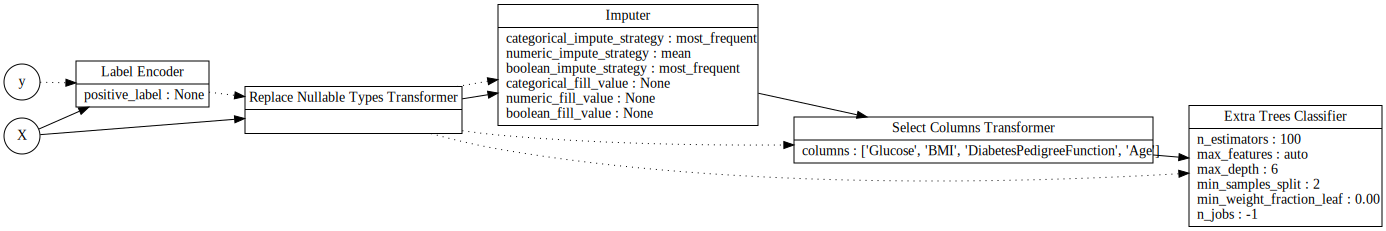

In [21]:
best.graph()

THE MODEL

In [31]:
model=best
model.fit(xtrain,ytrain)

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Replace Nullable Types Transformer': ['Replace Nullable Types Transformer', 'X', 'Label Encoder.y'], 'Imputer': ['Imputer', 'Replace Nullable Types Transformer.x', 'Replace Nullable Types Transformer.y'], 'Select Columns Transformer': ['Select Columns Transformer', 'Imputer.x', 'Replace Nullable Types Transformer.y'], 'Extra Trees Classifier': ['Extra Trees Classifier', 'Select Columns Transformer.x', 'Replace Nullable Types Transformer.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'boolean_impute_strategy': 'most_frequent', 'categorical_fill_value': None, 'numeric_fill_value': None, 'boolean_fill_value': None}, 'Select Columns Transformer':{'columns': ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']}, 'Extra Trees Classifier':{'n_estimators': 100, 'max_features': 'auto', 

In [32]:
predd=model.predict(xtest)

Evaluation Metrics

In [34]:
print('Accuracy score: ',accuracy_score(ytest,predd))

Accuracy score:  0.7987012987012987


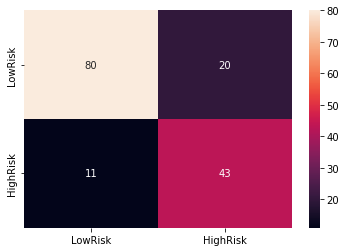

In [36]:
mat=confusion_matrix(ytest,predd)
sns.heatmap(mat,annot=True,fmt='d',xticklabels=['LowRisk','HighRisk'],yticklabels=['LowRisk','HighRisk']);

In [37]:
print(classification_report(ytest,predd))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       100
           1       0.68      0.80      0.74        54

    accuracy                           0.80       154
   macro avg       0.78      0.80      0.79       154
weighted avg       0.81      0.80      0.80       154

